In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica",
  'font.size': 12
})

# define parameters
lambdac=950e-9
dlambda=10e-9
P0=1e-3
tau=1e-6
N=256

kc=2*np.pi/lambdac
dk=dlambda*2*np.pi/lambdac**2             # FWHM_k
sigmak = dk/(2*np.sqrt(2*np.log(2)))        # std
kmin=kc-5*dk                        # 2*dk is necessary to avoid problems in the z-domain
kmax=kc+5*dk

ks=np.linspace(kmin,kmax,N)
deltaks=ks[2]-ks[1]
zs=np.linspace(-0.5*np.pi/deltaks, 0.5*np.pi/deltaks-1/(kmax-kmin), N)
deltazs=zs[2]-zs[1]
zmax=np.pi/2/(ks[1]-ks[0])

alpha=0.5
zmir=100e-6

zr=np.linspace(0,zmax, N)

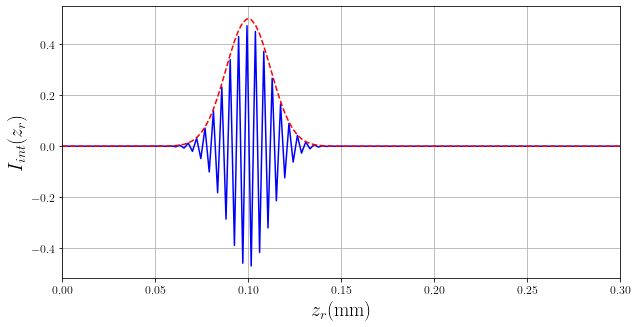

In [8]:
## TD OCT simulation

Izint=2*alpha*(1-alpha)*np.exp(-(2*zmir-2*zr)**2*sigmak**2)*np.cos(2*(2*zmir-2*zr)*kc)

# oveflow warning with (np.exp(kc**2/2/sigmak**2))

plt.figure(1, figsize=[10, 5])
plt.plot(1e3*zr, Izint, '-b')
plt.plot(1e3*zr, 2*alpha*(1-alpha)*np.exp(-(2*zmir-2*zr)**2*sigmak**2), '--r')
plt.xlim([0, 0.3])
plt.xlabel('$z_r ($mm$)$', fontsize=20)
plt.ylabel('$I_{int}(z_r)$', fontsize=20)
plt.grid()

plt.savefig('tdoctsignal.png', bbox_inches='tight', dpi=250)

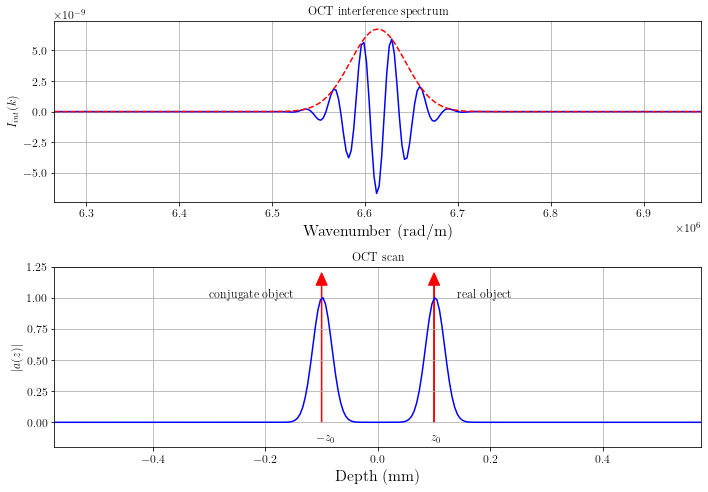

In [7]:
## FD OCT simulation

Sks=P0/(np.sqrt(2*np.pi*sigmak**2))*np.exp(-(ks-kc)**2/(2*sigmak**2))

Ekref=np.sqrt(alpha*(1-alpha))*np.sqrt(Sks)
Eksam=np.sqrt(alpha*(1-alpha))*np.sqrt(Sks)*np.exp(1j*2*ks*zmir)
Ikints=np.real((Eksam+Ekref)*np.conj(Eksam+Ekref))-np.real(Ekref*np.conj(Ekref))-np.real(Eksam*np.conj(Eksam))

plt.figure(2, figsize=[10,7])
plt.subplot(2,1,1) 
plt.plot(ks, Ikints, '-b')
plt.plot(ks, 2*alpha*(1-alpha)*Sks, '--r')
plt.xlim([kmin, kmax])
plt.title('OCT interference spectrum', fontsize=12)
plt.xlabel('Wavenumber (rad/m)', fontsize=16)
plt.ylabel('$I_{int} (k)$')
plt.grid()

izs=np.fft.fftshift(np.fft.ifft(Ikints))

plt.subplot(2,1,2) 
plt.plot(1e3*zs, np.abs(izs)/np.max(np.abs(izs)), '-b')
plt.arrow(1e3*zmir ,0, 0, 1.1, width=0.001, head_width=0.02, head_length=0.1, facecolor='r', edgecolor='r')
plt.text(1e3*1.4*zmir, 1, 'real object')
plt.text(1e3*0.95*zmir, -0.15, '$z_0$')

plt.arrow(-1e3*zmir ,0, 0, 1.1, width=0.001, head_width=0.02, head_length=0.1, facecolor='r', edgecolor='r')
plt.text(-1e3*3*zmir, 1, 'conjugate object')
plt.text(-1e3*1.1*zmir, -0.15, '$-z_0$')

plt.xlim([-1e3*zmax, 1e3*zmax])
plt.ylim([-0.2, 1.25])
plt.title('OCT scan', fontsize=12)
plt.xlabel('Depth (mm)', fontsize=16)
plt.ylabel('$|a(z)|$')
plt.grid()

plt.tight_layout()

plt.savefig('fdoctsignal.png', bbox_inches='tight', dpi=250)